## 2. Aprendizagem de máquina

### Objetivos

  - continuação de aprendizado não supervisionado
  - Apresentar uma intuição dos algoritimos de agupamento por densidade - DBScan
  - Apresentar uma intuição e praticar o algoritimo de agrupamento hierarquico - AGNES

## Métodos de agrupamento


### De forma geral as estratégias de agrupamento são:

 - Partição: exemplo KMeans
 - Densidade: exemplo DBSCAN
 - Hierarquicas: exemplo AGNES
 
Utilizamos a ferramenta `orange-canvas` para obter uma intuição sobre esses algoritimos além de compreender suas principais diferença.

## Desafio 1 (Sugestão)

Faça a instalação do `orange-canvas` em sua maquina e realize os exemplos dados em sala de aula.  

Para usuarios linux o site oficial https://orangedatamining.com/ recomenda o uso de virutal env, eu uso direto sem virtual env:

  Instalação:

    sudo apt install python3-pyqt5.*
    pip install --upgrade --user pyqtwebengine==5.12
    pip install --upgrade --user pyqt5==5.12
    pip3 install orange3 --user
    pip install orange3-educational


   Execute:

    python3 -m Orange.canvas
    ou
    orange-canvas


## Agrupamento por estratégia Hierarquica



### Introdução ao Problema: Segmentação de Clientes

Você é um analista de dados contratado por um grande shopping center. O shopping quer melhorar suas campanhas de marketing e otimizar o atendimento aos clientes. Atualmente, eles possuem uma vasta quantidade de dados sobre seus clientes, mas enfrentam um desafio: Como identificar grupos de clientes que compartilham características semelhantes para criar estratégias de marketing mais eficazes?

### Descrição do Problema

Você recebeu um dataset contendo informações sobre os clientes do shopping. Este dataset inclui variáveis como a idade dos clientes, sua renda anual, e uma pontuação de gastos, que representa o quanto esses clientes tendem a gastar. Com base nesses dados, sua tarefa é identificar grupos distintos de clientes que possam ser tratados de forma diferente pelo shopping.

Por exemplo, pode haver um grupo de clientes jovens com alta renda que gasta muito, ou outro grupo de clientes mais velhos com uma renda menor, mas que são clientes fiéis e regulares. Entender essas segmentações pode ajudar o shopping a personalizar ofertas, melhorar a satisfação do cliente e, consequentemente, aumentar as vendas.

### Reflexão Inicial

Antes de mergulharmos nas técnicas de clustering, pense nas seguintes questões:

- Quais características dos clientes são mais importantes para identificar padrões de comportamento?
- Como você definiria um "grupo" de clientes em termos de características como idade, renda e pontuação de gastos?
- O que você esperaria encontrar após agrupar os clientes? Quais tipos de grupos ou segmentos você acha que poderiam surgir?

- Como você pode preparar os dados para que sejam adequados para análise de clustering?
- Qual técnica de clustering você escolheria para este problema e por quê?
- Como você pode avaliar se os grupos identificados realmente fazem sentido?

#### Importa libs

In [1]:
%matplotlib inline

# O scipy é bastante utilizada para Data Science
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Importa dataset

In [2]:
url_db= 'https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv'
df = pd.read_csv(url_db)

#renomeando o nome das colunas para tirar espaço
df.columns = ['CustomerID', 'Genre', 'Age', 'Annual_Income_k','Spending_Score_1_100']
df.head()

,CustomerID,Genre,Age,Annual_Income_k,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Descrição das colunas do dataset:

                CustomerID = Identificação do usuario
                    Genre  = Genero
                    Age    = Idade
        Annual Income (k$) = Rendimento anual em k$	
    Spending Score (1-100) = Indice de "vontade de gastar no shooping"

#### Criando um subset

In [4]:
data = df.iloc[:,[3,4]].values;
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Visualização no espaço 2D

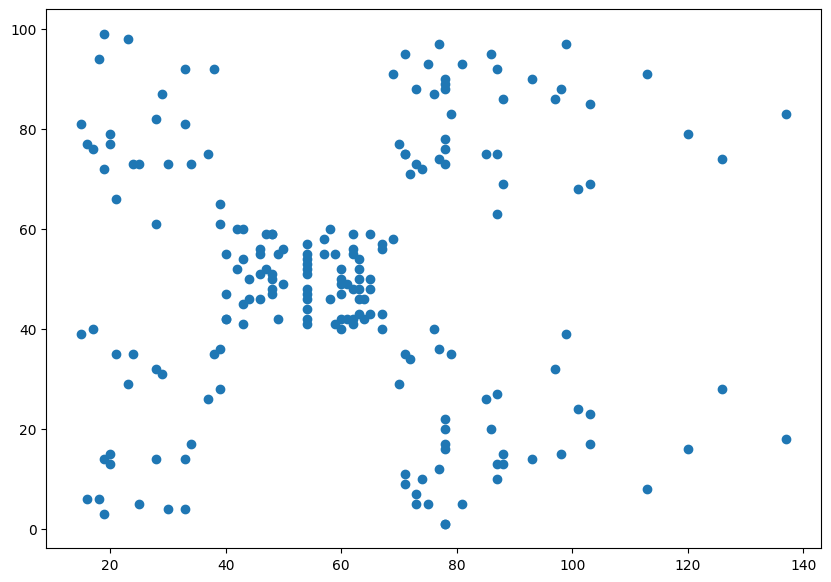

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(data[:, 0], data[:, 1])


## Desafio 2

Realize uma análise visual e determine uma quantidade de cluster. 

    [ ] - 2 clusters
    [ ] - 3 clusters
    [ ] - 4 clusters
    [ ] - 5 clusters
    [ ] - 6 clusters
    [ ] - 7 clusters
    [ ] - 8 clusters    


### Dendrograma

O dendrograma é uma forma grafica de visualizar o agrupamentos de objetos. 

O agrupamento (`linkage`) é feito de forma iterativa: No inicio, cada objeto é um cluster e no fim, todos os objetos fazem parte do mesmo cluster. 

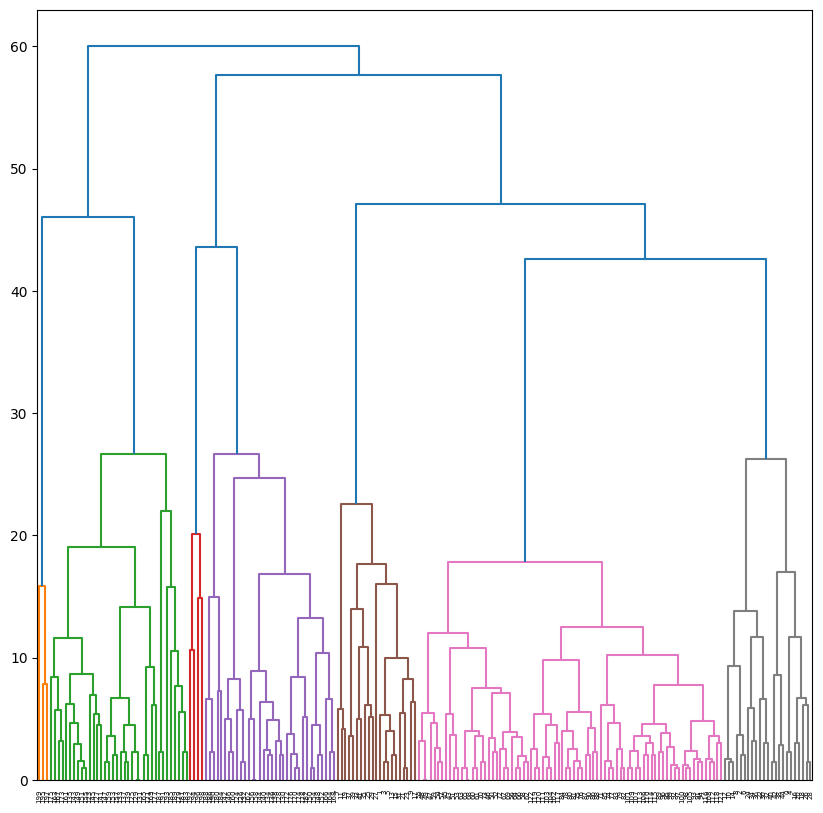

In [8]:
plt.figure(figsize=(10,10))
den = dendrogram(linkage(data, method='average'))
#plt.axhline(y=30)

## Desafio 2

Visualmente, com base no dendrograma acima, qual seria o melhor corte para realizar a clusterização hierarquica?

    [ ] - 2 clusters
    [ ] - 3 clusters
    [ ] - 4 clusters
    [ ] - 5 clusters
    [ ] - 6 clusters
    [ ] - 7 clusters
    [ ] - 8 clusters 


## Desafio 3

O agrupameno dos dados foi realizado a partir do calculo da média (average). Realize um estudo para comparar com outros linkage methtods. 

    single
    complete
    average
    weighted
    centroid
    median
    ward

Compare os resultados de pelo menos 3 métodos: **single**, **average** e **ward**


Referência: Leia a documentação oficial https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage



In [29]:
## sua resposta aqui.....









## AGNES

AGNES (AgglomerativeClustering) é uma estratégia de agrupamento de dados do tipo botton-top.

Como parametros deve ser passado o numero de cluster que foi encontrado no dendrograma e os metodos utilizados affinity e linkage.

In [9]:
cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
cluster.fit_predict(data)

TypeError: __init__() got an unexpected keyword argument 'affinity'

In [35]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap="rainbow")

NameError: name 'cluster' is not defined

<Figure size 1000x700 with 0 Axes>

## Desafio 4

Utilizando este dataset compare com os resultados para KMeans e DBSCAN

In [38]:
## implemente sua resposta



